In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io, color, util, filters
from skimage.morphology import disk, dilation, erosion, opening, closing, square, diamond, rectangle

## **1. [50] Noise Removal**
## Diberikan sebuah citra xray bernama noisy_xray.png. Sayangnya citra ini memiliki noise berupa bintik-bintik putih yang mengganggu di hasil x-ray.
<img src="Citra Tugas Lab 4\noisy_xray.jpg">

## a. [20] Bersihkan noise pada gambar di atas menggunakan morphology operator!

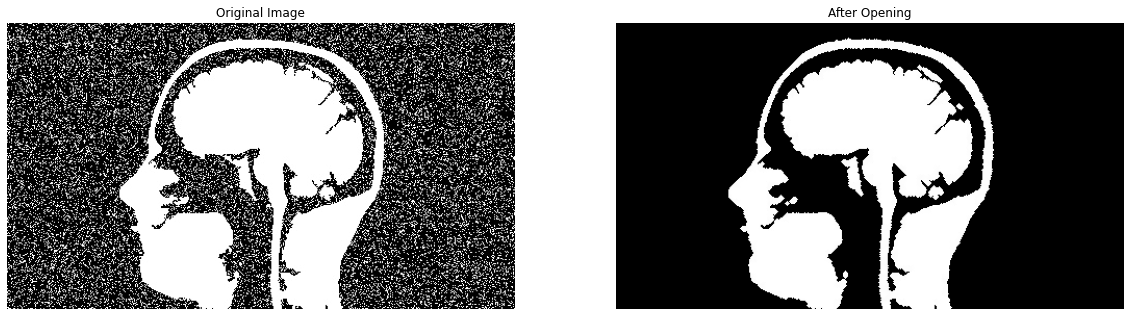

In [2]:
# Load image
image = io.imread("Citra Tugas Lab 4/noisy_xray.jpg")

# Do Opening
se = disk(2)
image_open = opening(image, se)

# Show image
plt.figure(figsize=(20,10))
plt.subplot(1,2,1); plt.imshow(image, cmap='gray'); plt.title('Original Image'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(image_open, cmap='gray'); plt.title('After Opening'); plt.axis('off')
plt.show()

## b. [15] Ceritakan mengapa Anda mengerjakan poin a dengan cara tersebut!


> Pada soal kita diminta untuk menghilangkan noise pada citra. Tentunya cara untuk menghilangkannya adalah dengan Erosion. Namun, apabila hanya digunakan Erosion, bagian tertentu dari tampilan xray juga akan ikut hilang. Oleh karena itu, dilakukan pula Dilation atau dalam kasus ini digunakan Opening yang merupakan kombinasi dari Erosion yang diikuti dengan Dilation untuk menghilangkan noise tanpa merusak tampilan xray.

## c. [15] Sebelumnya Anda pernah melakukan noise removal dengan menggunakan median dan mean filter di lab 1. Jabarkan bagaimana perbedaan pada hasilnya jika dibandingkan dengan noise removal di lab 4 ini?


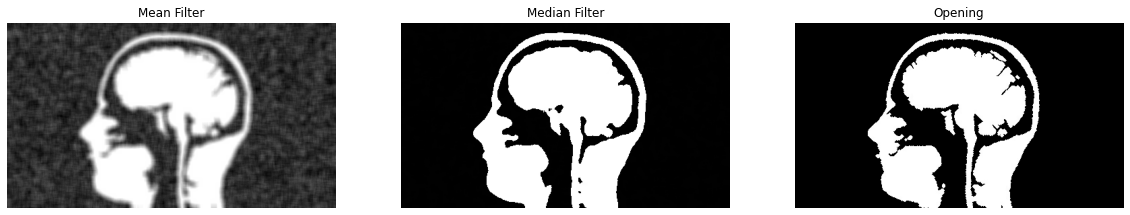

In [3]:
image_med = filters.rank.median(image, selem=square(9))
image_mean = filters.rank.mean(image, selem=square(9))

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1); plt.imshow(image_mean, cmap="gray"); plt.title("Mean Filter"); plt.axis("off")
plt.subplot(1, 3, 2); plt.imshow(image_med, cmap="gray"); plt.title("Median Filter"); plt.axis("off")
plt.subplot(1, 3, 3); plt.imshow(image_open, cmap="gray"); plt.title("Opening"); plt.axis("off")
plt.show()

> Jika dilihat pada gambar di atas, masing-masing metode menghasilkan citra yang berbeda. **Mean Filter** dan **Median Filter** memiliki kegunaan utama yaitu smoothing, hanya saja untuk **Median Filter** dapat memberikan hasil yang bagus meskipun citra memiliki noise, sedangkan **Mean Filter** tidak. Berbeda dengan melakukan **Opening** yang tujuannya untuk _Noise Removal_. Dapat dilihat bahwa citra yang dihasilkan setelah dilakukan **Median Filter** lebih halus dibandingkan **Opening**. Beberapa detail juga hilang pada citra hasil **Median Filter**, tetapi tetap ada pada **Opening**.

## **2. [50] Pesan rahasia**
## Anda mendapat pesan rahasia yang terdiri dari dua citra. Untuk dapat membaca pesan ini, Anda harus menerapkan morphological image processing pada masing-masing citra, kemudian menggabungkannya menjadi satu. Berikut petunjuknya.

<img src="Citra Tugas Lab 4\misteri1.jpg">
<img src="Citra Tugas Lab 4\misteri2.jpg">

## a. [30] Lakukan dilatasi terhadap citra misteri1.jpg dan misteri2.jpg dengan kernel yang tepat. Hanya ada satu pasang kernel yang benar untuk membuka pesan rahasia. Berikut adalah pilihan kernel yang bisa Anda coba:
## ● {diamond(25), diamond(17)}
## ● {rectangle(12, 25), rectangle(20, 10)}
## ● {rectangle(46, 1), rectangle(1, 44)}
## ● {disk(13), disk(19)}
### Format: {kernel citra misteri1.jpg, kernel citra misteri2.jpg}


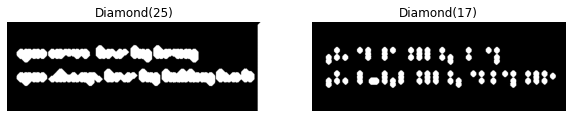

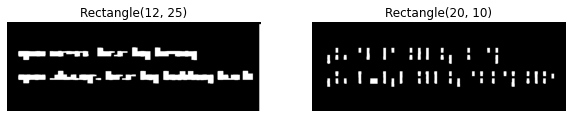

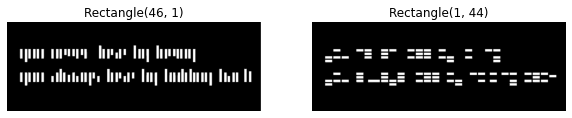

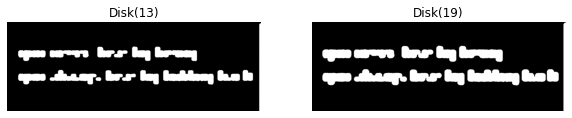

In [4]:
# Load image
ms1 = io.imread("Citra Tugas Lab 4/misteri1.jpg")
ms2 = io.imread("Citra Tugas Lab 4/misteri2.jpg")

# Diamond(25) & Diamond(17)
d1 = dilation(ms1, diamond(25))
d2 = dilation(ms2, diamond(17))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1); plt.imshow(d1, cmap="gray"); plt.title("Diamond(25)"); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(d2, cmap="gray"); plt.title("Diamond(17)"); plt.axis("off")
plt.show()

# Rectangle(12, 25) & Rectangle(20, 10)
r1 = dilation(ms1, rectangle(12, 25))
r2 = dilation(ms2, rectangle(20, 10))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1); plt.imshow(r1, cmap="gray"); plt.title("Rectangle(12, 25)"); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(r2, cmap="gray"); plt.title("Rectangle(20, 10)"); plt.axis("off")
plt.show()

# Rectangle(46, 1) & Rectangle(1, 44)
r3 = dilation(ms1, rectangle(46, 1))
r4 = dilation(ms2, rectangle(1, 44))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1); plt.imshow(r3, cmap="gray"); plt.title("Rectangle(46, 1)"); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(r4, cmap="gray"); plt.title("Rectangle(1, 44)"); plt.axis("off")
plt.show()

# Disk(13) & Disk(19)
ds1 = dilation(ms1, disk(13))
ds2 = dilation(ms1, disk(19))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1); plt.imshow(ds1, cmap="gray"); plt.title("Disk(13)"); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(ds2, cmap="gray"); plt.title("Disk(19)"); plt.axis("off")
plt.show()

## b. [13] Gabungkan kedua citra hasil dilatasi poin a! Jika kernel yang Anda pilih benar, pesan rahasia akan terlihat.

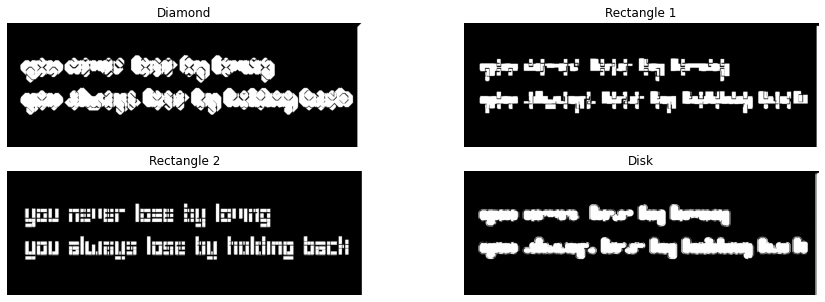

In [5]:
# Diamond
d = d1 + d2

# Rectangle 1
rec1 = r1 + r2

# Rectangle 2
rec2 = r3 + r4

# Disk
ds = ds1 + ds2

plt.figure(figsize=(15, 5))
plt.subplot(2, 2, 1); plt.imshow(d, cmap="gray"); plt.title("Diamond"); plt.axis("off")
plt.subplot(2, 2, 2); plt.imshow(rec1, cmap="gray"); plt.title("Rectangle 1"); plt.axis("off")
plt.subplot(2, 2, 3); plt.imshow(rec2, cmap="gray"); plt.title("Rectangle 2"); plt.axis("off")
plt.subplot(2, 2, 4); plt.imshow(ds, cmap="gray"); plt.title("Disk"); plt.axis("off")
plt.show()

## c. [7] Tuliskan pesan rahasia yang Anda dapatkan!

# you never lose by loving
# you always lose by holding back